## TF

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pylab as plt

import numpy as np
import os

## Parameter Setting

In [2]:
learning_rate = 0.001
epochs = 50
batch_size=64

## Load Data

In [3]:
(train_image, train_label), (test_image, test_label) = mnist.load_data()

train_image = train_image.astype(np.float32)
test_image = test_image.astype(np.float32)

train_image = np.expand_dims(train_image, axis=1)
test_image = np.expand_dims(test_image, axis=1)

train_label = to_categorical(train_label, 10)
test_label = to_categorical(test_label, 10)

train_data = tf.data.Dataset.from_tensor_slices((train_image, train_label)).shuffle(buffer_size=1000000).batch(batch_size)
test_data = tf.data.Dataset.from_tensor_slices((test_image, test_label)).batch(batch_size)

## Model setting

In [36]:
input_shape = (1,28,28)
model = keras.Sequential()

# Part1
model.add(keras.layers.Conv2D(96, (3,3), strides=1, padding='same', input_shape=input_shape))
model.add(keras.layers.MaxPool2D(pool_size=(3,3), padding='same'))
model.add(keras.layers.BatchNormalization())

# Part2
model.add(keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPool2D(pool_size=(3,3), padding='same'))
model.add(keras.layers.BatchNormalization())

# Part3
model.add(keras.layers.Conv2D(384, (3,3), strides=1, activation='relu', padding='same'))
model.add(keras.layers.Conv2D(384, (3,3), strides=1, activation='relu', padding='same'))
model.add(keras.layers.Conv2D(256, (3,3), strides=1, activation='relu', padding='same'))
model.add(keras.layers.MaxPool2D(pool_size=(3,3), padding='same'))
model.add(keras.layers.Flatten())

# Dense
model.add(keras.layers.Dense(4096, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(4096, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(10, activation='softmax'))


In [37]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 1, 28, 96)         24288     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 1, 10, 96)        0         
 g2D)                                                            
                                                                 
 batch_normalization_13 (Bat  (None, 1, 10, 96)        384       
 chNormalization)                                                
                                                                 
 conv2d_38 (Conv2D)          (None, 1, 10, 256)        221440    
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 1, 4, 256)        0         
 g2D)                                                            
                                                     

## Fit

In [38]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_image, train_label, epochs=epochs)

Epoch 1/50
1875/1875 [==============================] - 17s 8ms/step - loss: 0.2639 - accuracy: 0.9328
Epoch 2/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1400 - accuracy: 0.9681
Epoch 3/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1131 - accuracy: 0.9748
Epoch 4/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1032 - accuracy: 0.9772
Epoch 5/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0880 - accuracy: 0.9806
Epoch 6/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0808 - accuracy: 0.9822
Epoch 7/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0751 - accuracy: 0.9833
Epoch 8/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0648 - accuracy: 0.9854
Epoch 9/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0659 - accuracy: 0.9859
Epoch 10/50
1875/1875 [==============================] - 16s 8ms/step - l

## Graph

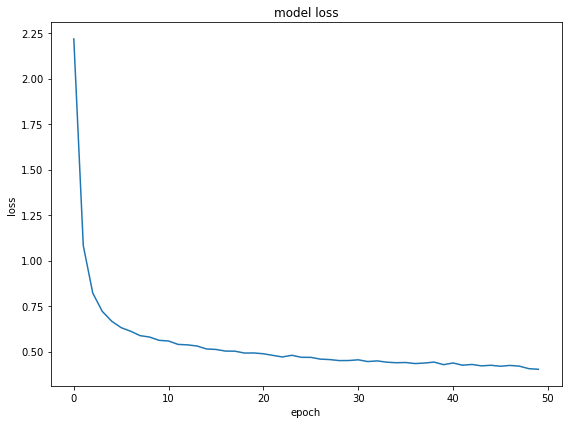

In [8]:
plt.figure(figsize=(8,6))
plt.title('model loss')

plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

plt.tight_layout()
plt.show()

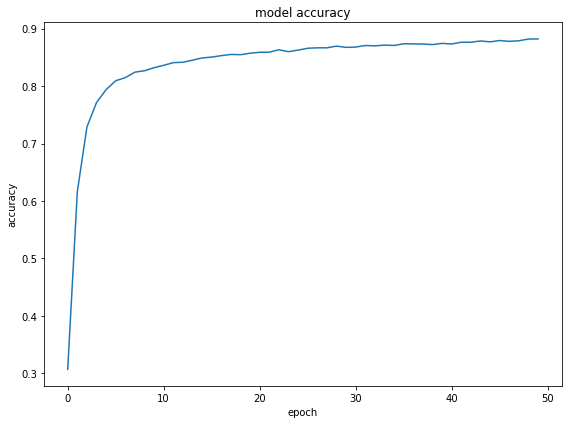

In [9]:
plt.figure(figsize=(8,6))
plt.title('model accuracy')

plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.tight_layout()
plt.show()

## Evaluate

In [10]:
test_loss, test_acc = model.evaluate(test_image, test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.1468 - accuracy: 0.9580


In [59]:
print(model.predict(test_image[:10]))


1/1 [==============================] - 0s 18ms/step
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.57853849e-33
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 3.48788894e-18 1.11207070e-08 2.97892996e-15
  5.82977622e-13 7.80893308e-13 2.80299641e-08 3.12050190e-13
  1.09291333e-10 3.09251133e-13]
 [7.20363860e-23 2.06118917e-20 2.15181666e-21 2.91316795e-29
  1.00000000e+00 8.05322830e-26 8.87922553e-18 1.03338776e-19
  4.00338049e-21 1.11274202e-14]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.16

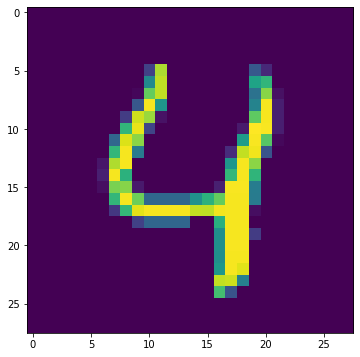

In [62]:
img = test_image[4]
plt.figure(figsize=(8,6))
plt.imshow(img.reshape([28,28]))
plt.show()